📊 월별 데이터 행 개수

| 월     | 행 개수        |
|--------|----------------|
| 10월   | 42,448,764     |
| 11월   | 67,501,979     |
| 12월   | 67,542,878     |
| 1월    | 55,967,041     |
| 2월    | 55,318,565     |
| 3월    | 56,341,241     |
| 4월    | 66,589,268     |

In [ ]:
from google.colab import drive

# 1. Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. 파일 경로 설정 (사용자 지정 경로)
data_root = '/content/drive/MyDrive/Colab Notebooks/datathon'
# file_path = f'{data_root}/2019-Nov.csv'

#데이터 불러오기 + 기본 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [ ]:
sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [ ]:
df = pd.read_parquet(f'{data_root}/2019-Oct.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 15 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
 9   event_date     datetime64[ns]     
 10  event_hour     int32              
 11  category_lvl1  object             
 12  category_lvl2  object             
 13  category_lvl3  object             
 14  category_lvl4  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int32(1), int64(3), object(8)
memory usage: 4.6+ GB


In [ ]:
# # datetime 형식으로 되어 있어야 함
# df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
# # 날짜, 시간 파생 -> 일자별 트렌드, 리텐션, 시계열 그래프 or 시간대별 유입/이탈 분석, 마케팅 시간 설정 가능
# # event_date를 datetime으로 변환 (안정성 확보)
# df['event_date'] = pd.to_datetime(df['event_time'].dt.date)

# # 시간 컬럼 생성 (00시 단위까지만)
# df['event_hour'] = df['event_time'].dt.hour

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,None,None,None,None
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,furniture,living_room,sofa,None
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,computers,notebook,None,None
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None


In [ ]:
# # 정렬
# df = df.sort_values(by=['user_id', 'event_time'])

In [ ]:
# event_type 컬럼의 고유값 확인

df['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [ ]:
# 전체 결측치 수 및 비율 확인
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_summary

,Missing Count,Missing %
brand,6117080,14.410502
category_code,13515609,31.839818
category_id,0,0.000000
category_lvl1,13515609,31.839818
category_lvl2,13515609,31.839818
category_lvl3,30872044,72.727781
category_lvl4,42412522,99.914622
event_date,0,0.000000
event_hour,0,0.000000
event_time,0,0.000000


In [ ]:
# user_session이 결측치인 행만 필터링
missing_session = df[df['user_session'].isnull()]

# 해당 행들의 event_type 분포 확인 -> cart 라서 빼도 될 듯
missing_session['event_type'].value_counts()

,count
event_type,
cart,2


(전)신규 고객 정의 및 행동 분석
#(변경 후)구매 빈도가 낮은 고객 분석 → 이탈 징후 탐지 및 리텐션 전략 수립
“구매 빈도가 낮은 고객들의 이탈 징후를 파악하고, 재방문·재구매를 유도할 수 있는 전략 수립"

#EDA

In [ ]:
# 고객별 구매 간격(재구매 주기) 및 구매 횟수 분포
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'])
purchase_df = purchase_df.sort_values(by=['user_id', 'event_time']) # user_id별로 event_time을 오름차순 정렬

# 재구매 간격 1. 다음 구매일
purchase_df['next_purchase'] = purchase_df.groupby('user_id')['event_time'].shift(-1)
# 2. 다음 구매일 - 현재 구매일
purchase_df['days_to_next'] = (purchase_df['next_purchase'] - purchase_df['event_time']).dt.days

<Axes: >

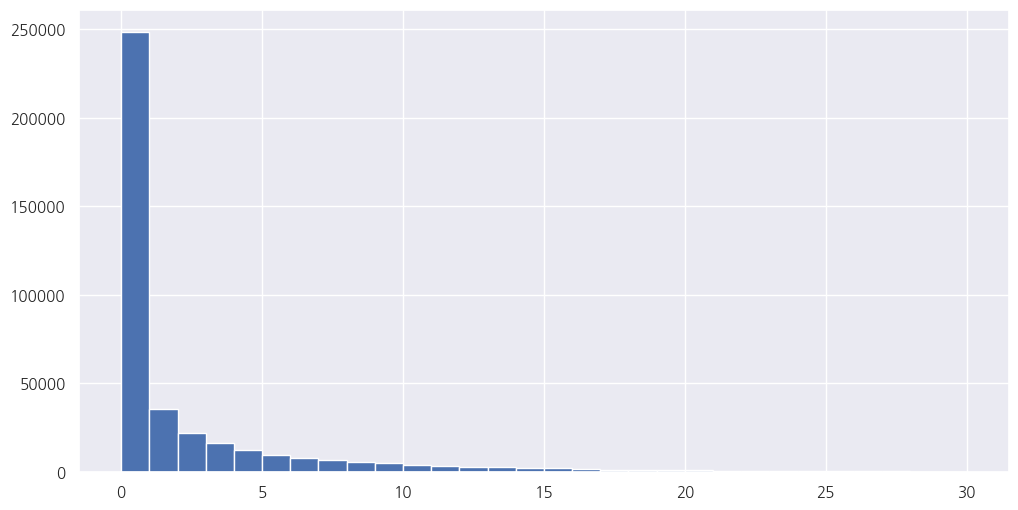

In [ ]:
purchase_df['days_to_next'].dropna().clip(upper=60).hist(bins=30)

In [ ]:
# 고객별 총 구매 횟수
user_purchase_freq = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

In [ ]:
user_purchase_freq

,user_id,purchase_count
0,264649825,2
1,303160429,1
2,340041246,4
3,371877401,1
4,384989212,1
...,...,...
347113,566270177,1
347114,566272569,2
347115,566274637,1
347116,566276996,1


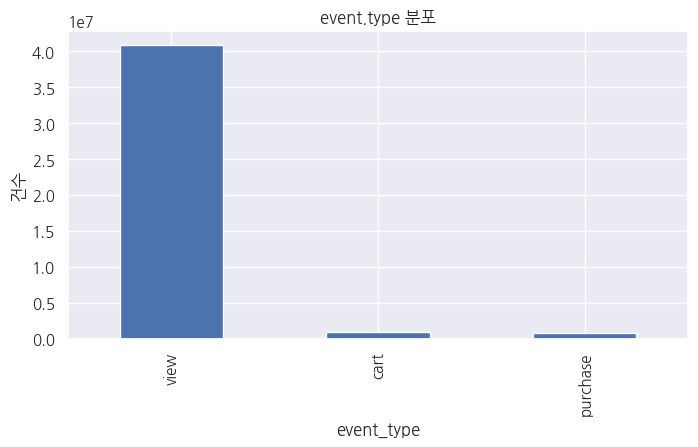

In [ ]:
# 이벤트 유형 분포 확인
df['event_type'].value_counts().plot(kind='bar', title='event.type 분포', figsize=(8,4))
plt.xlabel('event_type'); plt.ylabel('건수')
plt.show()


In [ ]:
# 고객별 첫 구매 ~ 다음 구매 간 시간 간격 계산
purchase_df['next_purchase'] = purchase_df.groupby('user_id')['event_time'].shift(-1)
purchase_df['days_to_next'] = (purchase_df['next_purchase'] - purchase_df['event_time']).dt.days

# 고객별 구매 횟수
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

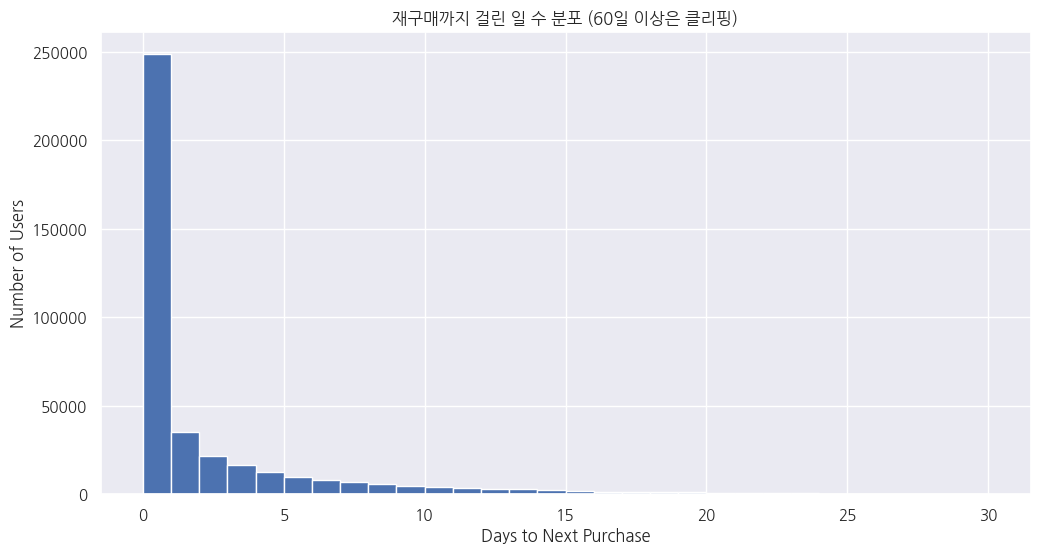

In [ ]:
# 재구매 간격 분포 확인
import matplotlib.pyplot as plt

purchase_df['days_to_next'].dropna().clip(upper=60).hist(bins=30)
plt.title('재구매까지 걸린 일 수 분포 (60일 이상은 클리핑)')
plt.xlabel('Days to Next Purchase')
plt.ylabel('Number of Users')
plt.show()

-> n일 이상 재구매 없으면 이탈이라는 기준 설정 필요

In [ ]:
# 제품 정보 확인
df['category_code'].value_counts().head(20)

,count
category_code,
electronics.smartphone,11507231
electronics.clocks,1311033
computers.notebook,1137623
electronics.video.tv,1113750
electronics.audio.headphone,1100188
appliances.kitchen.refrigerators,887755
appliances.kitchen.washer,869404
appliances.environment.vacuum,801670
apparel.shoes,763901


#딱 한 번 구매한 고객 데이터셋 만들기

In [ ]:
# 1. 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. user_id별 구매 횟수 계산
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 3. 정확히 1회 구매한 유저 추출
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]

# 4. 구매 1회 유저의 구매 로그만 추출
one_time_purchase_df = purchase_df[purchase_df['user_id'].isin(one_time_buyers['user_id'])].copy()

# 5. user_id 중복 여부 확인
has_duplicates = one_time_purchase_df['user_id'].duplicated().any()

# 6. 결과 출력
print(f"🎯 한 번만 구매한 고객 수: {len(one_time_buyers):,}명")
print(f"✅ 중복 user_id 존재 여부: {has_duplicates}")

🎯 한 번만 구매한 고객 수: 215,691명
✅ 중복 user_id 존재 여부: False


In [ ]:
# # 1. CSV 파일로 저장 (파일명은 원하는 대로 지정 가능)
# one_time_purchase_df.to_csv('one_time_purchase_users.csv', index=False)

# # 2. 다운로드 링크 생성
# from google.colab import files
# files.download('one_time_purchase_users.csv')